
# Objective

# Pengenalan Kolom

### Tabel Fitur `Credit_Card.csv`

| **Nama Fitur**     | **Deskripsi**                                                                 |
|--------------------|-------------------------------------------------------------------------------|
| `Ind_ID`           | ID Klien                                                                      |
| `Gender`           | Informasi jenis kelamin                                                       |
| `Car_owner`        | Memiliki mobil atau tidak                                                     |
| `Propert_owner`    | Memiliki properti atau tidak                                                  |
| `Children`         | Jumlah anak                                                                   |
| `Annual_income`    | Pendapatan tahunan                                                            |
| `Type_Income`      | Jenis pendapatan                                                              |
| `Education`        | Tingkat pendidikan                                                            |
| `Marital_status`   | Status pernikahan                                                             |
| `Housing_type`     | Gaya hidup                                                                    |
| `Birthday_count`   | Menggunakan hitungan mundur dari hari ini (0), -1 berarti kemarin              |
| `Employed_days`    | Tanggal mulai bekerja. Menggunakan hitungan mundur dari hari ini (0). Nilai positif berarti individu saat ini tidak bekerja |
| `Mobile_phone`     | Ada ponsel atau tidak                                                         |
| `Work_phone`       | Ada telepon kerja atau tidak                                                  |
| `Phone`            | Ada nomor telepon atau tidak                                                  |
| `EMAIL_ID`         | Ada alamat email atau tidak                                                   |
| `Type_Occupation`  | Pekerjaan                                                                     |
| `Family_Members`   | Ukuran keluarga                                                            



### Tabel Fitur `Credit_Card_Label.csv`

| **Nama Fitur** | **Deskripsi**                                                         |
|----------------|-----------------------------------------------------------------------|
| `ID`           | Kunci penghubung antara data aplikasi dan data status kredit, sama dengan `Ind_ID` |
| `Label`        | 0 berarti aplikasi disetujui dan 1 berarti aplikasi ditolak           |

# Import Libraries

In [ ]:
!pip install phik
!pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 11.7 MB/s eta 0:00:00


In [ ]:
# Impor Pustaka yang Diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from google.colab import drive
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# Import the necessary module
import matplotlib.ticker as mtick

# import yang di perlukan Feature Engineering
import phik
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTENC
from collections import Counter


# import yang di perlukan Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Import train_test_split
from sklearn.model_selection import train_test_split


# Data Loading

In [ ]:
# Force remount to refresh authentication
drive.mount('/content/drive', force_remount=True)
# Membaca dataset dari drive
data = pd.read_csv('/content/drive/My Drive/Dataset/cleaned_credit_card.csv')  # Read the file after mounting


Mounted at /content/drive


# Overview

## Data Shape

In [ ]:
print("Jumlah baris:", data.shape[0])
print("Jumlah kolom:", data.shape[1])

Jumlah baris: 1106
Jumlah kolom: 18


jumlah baris dan kolom pada `data` sebelum dilakukan cleaning terlihat pada output, yaitu 1548 baris dan 19 kolom



In [ ]:
# Menampilkan  5 Dataset  baris pertama
data.head()

,gender,car_owner,propert_owner,children,annual_income,type_income,education,marital_status,housing_type,mobile_phone,work_phone,phone,email_id,type_occupation,family_members,label,customer_age_years,employement_status
0,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Other,2,1,37.0,Yes
1,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,1,1,Core staff,3,1,50.0,Yes
2,M,Y,Y,1,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,1,0,1,1,Core staff,3,1,50.0,Yes
3,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Core staff,1,1,50.0,Yes
4,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,1,1,1,0,Cooking staff,2,1,52.0,Yes


In [ ]:
data.duplicated().sum()

0

duplikasi pada `data` tidak ada, selanjutnya akan dilakukan pengecekan lainnya

In [ ]:
data.isna().sum()

,0
gender,0
car_owner,0
propert_owner,0
children,0
annual_income,0
type_income,0
education,0
marital_status,0
housing_type,0
mobile_phone,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106 entries, 0 to 1105
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              1106 non-null   object 
 1   car_owner           1106 non-null   object 
 2   propert_owner       1106 non-null   object 
 3   children            1106 non-null   int64  
 4   annual_income       1106 non-null   float64
 5   type_income         1106 non-null   object 
 6   education           1106 non-null   object 
 7   marital_status      1106 non-null   object 
 8   housing_type        1106 non-null   object 
 9   mobile_phone        1106 non-null   int64  
 10  work_phone          1106 non-null   int64  
 11  phone               1106 non-null   int64  
 12  email_id            1106 non-null   int64  
 13  type_occupation     1106 non-null   object 
 14  family_members      1106 non-null   int64  
 15  label               1106 non-null   int64  
 16  custom

## Data Cleaning

In [ ]:
# Mengubah nilai 1 menjadi 'Yes' dan 0 menjadi 'No' pada kolom-kolom tertentu
data['mobile_phone'] = data['mobile_phone'].replace({1: 'Yes', 0: 'No'})
data['work_phone'] = data['work_phone'].replace({1: 'Yes', 0: 'No'})
data['phone'] = data['phone'].replace({1: 'Yes', 0: 'No'})
data['email_id'] = data['email_id'].replace({1: 'Yes',0:'No'})

data['gender'] = data['gender'].replace({'F': 'Female','M':'Male'})
data['car_owner'] = data['car_owner'].replace({'Y': 'Yes','N':'No'})
data['propert_owner'] = data['propert_owner'].replace({'Y': 'Yes','N':'No'})

data['label'] = data['label'].replace({0:'Approved', 1:'Rejected'})


data.sample(10)

,gender,car_owner,propert_owner,children,annual_income,type_income,education,marital_status,housing_type,mobile_phone,work_phone,phone,email_id,type_occupation,family_members,label,customer_age_years,employement_status
654,Female,No,Yes,0,216000.0,Working,Secondary / secondary special,Married,House / apartment,Yes,Yes,No,No,Core staff,2,Approved,43.0,Yes
359,Female,No,No,0,99000.0,Working,Secondary / secondary special,Married,With parents,Yes,Yes,No,No,Medicine staff,2,Approved,54.0,Yes
600,Male,No,Yes,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,Yes,No,No,No,Laborers,2,Approved,48.0,Yes
145,Male,Yes,No,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,Yes,No,Yes,No,Drivers,2,Approved,43.0,Yes
489,Male,Yes,Yes,0,225000.0,State servant,Secondary / secondary special,Married,House / apartment,Yes,Yes,Yes,No,High skill tech staff,2,Approved,38.0,Yes
777,Female,Yes,No,0,315000.0,Working,Higher education,Married,House / apartment,Yes,No,Yes,Yes,Accountants,2,Approved,37.0,Yes
977,Female,No,Yes,0,126000.0,Commercial associate,Secondary / secondary special,Civil marriage,Municipal apartment,Yes,Yes,Yes,No,Laborers,2,Approved,29.0,Yes
108,Female,No,Yes,0,90000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Yes,No,No,No,Other,1,Approved,40.0,Yes
349,Female,Yes,Yes,1,270000.0,Working,Higher education,Separated,House / apartment,Yes,No,Yes,Yes,Sales staff,2,Approved,38.0,Yes
1102,Male,Yes,No,1,360000.0,State servant,Secondary / secondary special,Married,House / apartment,Yes,No,Yes,No,Drivers,3,Approved,31.0,Yes


## Data Copy

untuk memudahkan analisa dan mempertahankan dataset asli, maka kami membuat salinannya

In [ ]:
df=data.copy()

# EDA

# Lowercase Column Names

In [ ]:
# Lowercase all column names
df.columns = df.columns.str.lower()
df.head()

,gender,car_owner,propert_owner,children,annual_income,type_income,education,marital_status,housing_type,mobile_phone,work_phone,phone,email_id,type_occupation,family_members,label,customer_age_years,employement_status
0,Female,Yes,No,0,315000.0,Commercial associate,Higher education,Married,House / apartment,Yes,Yes,Yes,No,Other,2,Rejected,37.0,Yes
1,Male,Yes,Yes,1,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,Yes,No,Yes,Yes,Core staff,3,Rejected,50.0,Yes
2,Male,Yes,Yes,1,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,Yes,No,Yes,Yes,Core staff,3,Rejected,50.0,Yes
3,Male,Yes,Yes,1,450000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Yes,No,Yes,Yes,Core staff,1,Rejected,50.0,Yes
4,Female,Yes,Yes,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,Yes,Yes,Yes,No,Cooking staff,2,Rejected,52.0,Yes


# Statistic Descriptive

In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
children,1106.0,0.509042,0.846825,0.0,0.0,0.0,1.0,14.0
annual_income,1106.0,196717.198915,109036.842356,36000.0,135000.0,180000.0,225000.0,1575000.0
family_members,1106.0,2.285714,0.996698,1.0,2.0,2.0,3.0,15.0
customer_age_years,1106.0,40.609403,9.596345,21.0,33.0,40.0,48.0,65.0


berdasarkan statistic descriptive diatas dapat dilihat bahwa

- rata-rata pendapatan individu yang mengajukan credit yaitu 180000, dengan pendapatan maksimal 1575000 dan minimal 36000

- umur rata-rata individu adalah 40

# Distribution Column

### Distribution of Credit Card Approval

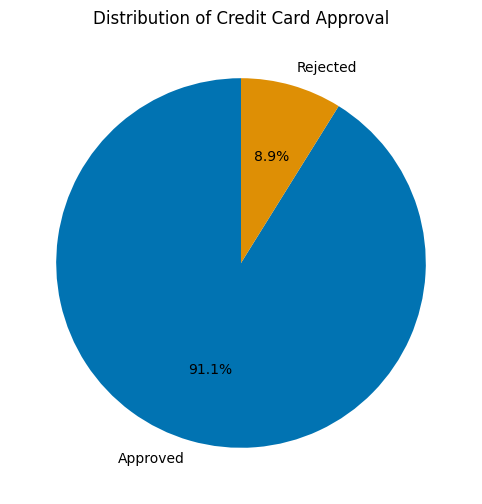

In [ ]:
# prompt: pie chart distribusi label pakai pallete colorblind

# Distribusi persetujuan kartu kredit
plt.figure(figsize=(8, 6))
df['label'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('colorblind'))
plt.title('Distribution of Credit Card Approval')
plt.ylabel('')
plt.show()


### Mean Annual Income by Credit Card Application Status

<ipython-input-14-abf460866a96>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=income_by_label.index, y=income_by_label.values, palette=palette)
<ipython-input-14-abf460866a96>:9: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.barplot(x=income_by_label.index, y=income_by_label.values, palette=palette)


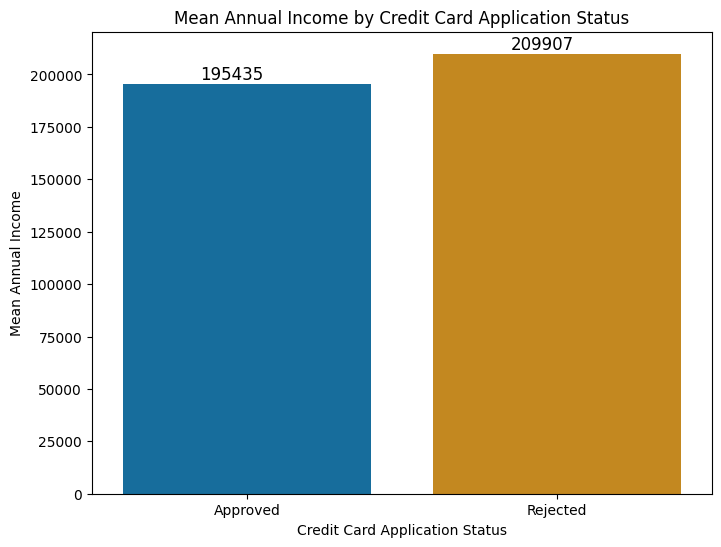

It seems that annual income doesn't have a significant impact on the credit card application approval.


In [ ]:
# Define colorblind-friendly palette
palette = sns.color_palette("colorblind")

# Group the data by 'label' and calculate the mean annual income for each group
income_by_label = df.groupby('label')['annual_income'].mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=income_by_label.index, y=income_by_label.values, palette=palette)
plt.xlabel('Credit Card Application Status')
plt.ylabel('Mean Annual Income')
plt.title('Mean Annual Income by Credit Card Application Status')

# Add labels above each bar
for p in ax.patches:
    value = '{:.0f}'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2 - 0.15
    y = p.get_y() + p.get_height() + 0.01 * income_by_label.max()
    ax.annotate(value, (x, y), size=12)

plt.show()

print("It seems that annual income doesn't have a significant impact on the credit card application approval.")


### Percentage of Rejected Credit Card Applications by Type of Income

<ipython-input-15-c1385caf79fd>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=grouped.index, y=grouped['Rejection Percentage'], palette='colorblind')


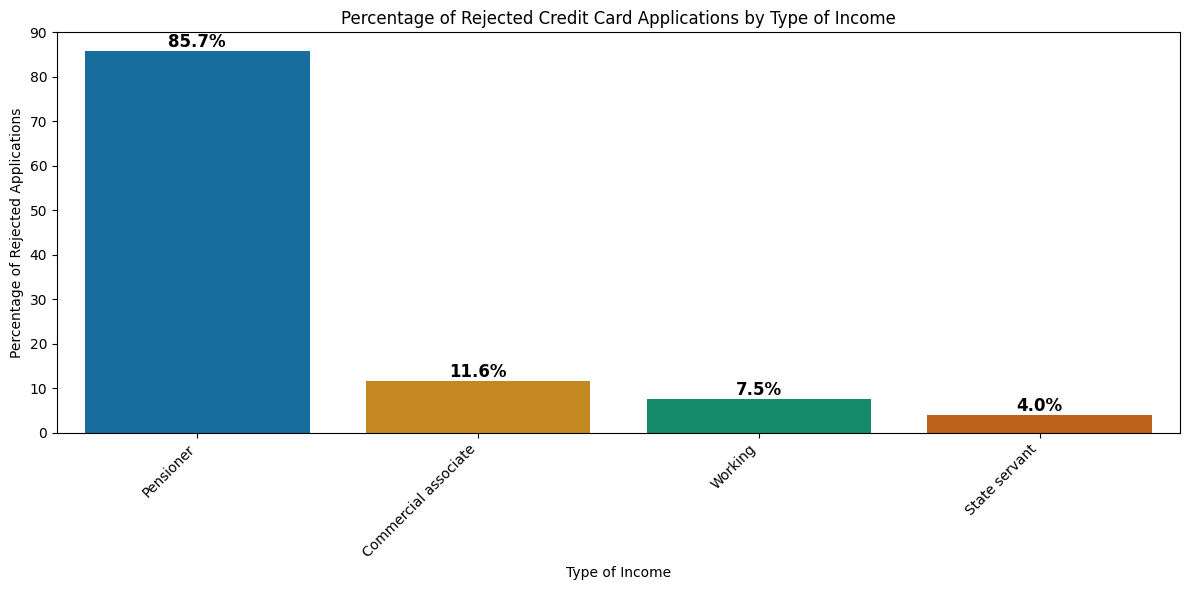

It seems that type of income has some influence on credit card application rejections.
Applicants with 'Working' as type of income have the highest rejection rates.


In [ ]:
# prompt: persentase rejection rate dari type_income dan visualisasinya

# Group the data by 'type_income' and 'label', and count the occurrences
grouped = df.groupby(['type_income', 'label'])['type_income'].count().unstack()

# Calculate the percentage of rejected applications for each type_income
grouped['Rejection Percentage'] = (grouped['Rejected'] / (grouped['Approved'] + grouped['Rejected'])) * 100

# Sort the results in descending order of rejection percentage
grouped = grouped.sort_values('Rejection Percentage', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=grouped.index, y=grouped['Rejection Percentage'], palette='colorblind')
plt.xlabel('Type of Income')
plt.ylabel('Percentage of Rejected Applications')
plt.title('Percentage of Rejected Credit Card Applications by Type of Income')
plt.xticks(rotation=45, ha='right')

# Add percentage labels above each bar
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', size=12, color='black', weight='bold')

plt.tight_layout()
plt.show()

print("It seems that type of income has some influence on credit card application rejections.")
print("Applicants with 'Working' as type of income have the highest rejection rates.")

In [ ]:
# prompt: Group the data by 'type_income' and 'label', and count the occurrences dan hitung totalnya, dan hitung hasil persentasenya

# Group the data by 'type_income' and 'label', and count the occurrences
grouped = df.groupby(['type_income', 'label'])['type_income'].count().unstack()

# Fill any missing values with 0
grouped = grouped.fillna(0)

# Calculate the total count for each type_income
grouped['Total'] = grouped['Approved'] + grouped['Rejected']

# Calculate the percentage of approved and rejected applications for each type_income
grouped['Approved Percentage'] = (grouped['Approved'] / grouped['Total']) * 100
grouped['Rejected Percentage'] = (grouped['Rejected'] / grouped['Total']) * 100

# Display the result
grouped


label,Approved,Rejected,Total,Approved Percentage,Rejected Percentage
type_income,,,,,
Commercial associate,281,37,318,88.364780,11.635220
Pensioner,1,6,7,14.285714,85.714286
State servant,96,4,100,96.000000,4.000000
Working,630,51,681,92.511013,7.488987


<Figure size 1200x600 with 0 Axes>

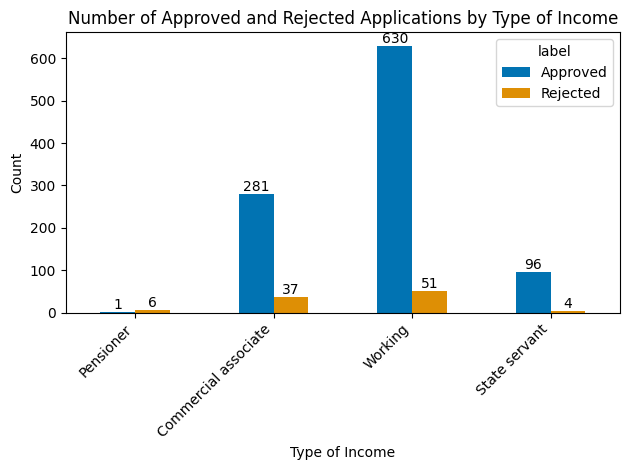

In [ ]:
# prompt: bikin buat double bar untuk type_income yang rejected dan approved kasih keterangan angka dan ukurannya disesuaikan agar keterangan angkanya keliatan, palletenya colorblind. urutannya samain kaya bar percentage-nya

# Group the data by 'type_income' and 'label', and count the occurrences
grouped = df.groupby(['type_income', 'label'])['type_income'].count().unstack()

# Fill any missing values with 0
grouped = grouped.fillna(0)

# Sort the results in descending order of rejection percentage
grouped['Rejection Percentage'] = (grouped['Rejected'] / (grouped['Approved'] + grouped['Rejected'])) * 100
grouped = grouped.sort_values('Rejection Percentage', ascending=False)
grouped = grouped.drop('Rejection Percentage', axis=1)

# Create a double bar plot
plt.figure(figsize=(12, 6))
ax = grouped.plot(kind='bar', color=sns.color_palette("colorblind"))
plt.xlabel('Type of Income')
plt.ylabel('Count')
plt.title('Number of Approved and Rejected Applications by Type of Income')
plt.xticks(rotation=45, ha='right')

# Add count labels above each bar
for p in ax.patches:
    count = '{:.0f}'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    ax.annotate(count, (x, y), ha='center', va='bottom', size=10, color='black')

plt.tight_layout()
plt.show()


### Percentage of Rejected Credit Card Applications by Housing Type

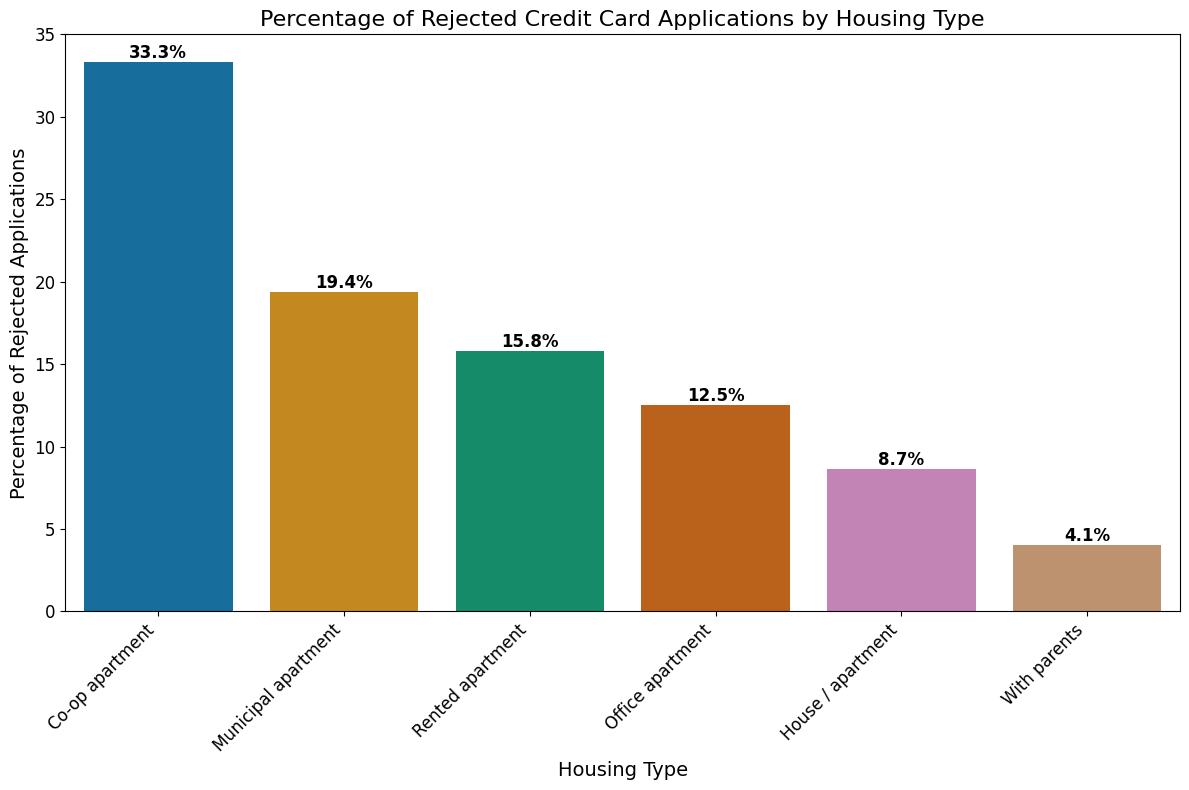

Individuals living in co-op apartment have a slightly higher chance of credit card application rejection compared to other housing types.


In [ ]:
# Group the data by 'housing_type' and 'label' and count the occurrences
housing_counts = df.groupby(['housing_type', 'label'])['label'].count().unstack()

# Calculate the percentage of rejected applications for each housing type
housing_rejection_percentage = (housing_counts['Rejected'] / housing_counts.sum(axis=1)) * 100

# Sort the percentages in descending order
housing_rejection_percentage = housing_rejection_percentage.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=housing_rejection_percentage.index, y=housing_rejection_percentage.values, hue=housing_rejection_percentage.index, palette='colorblind', legend=False)
plt.xlabel('Housing Type', fontsize=14)
plt.ylabel('Percentage of Rejected Applications', fontsize=14)
plt.title('Percentage of Rejected Credit Card Applications by Housing Type', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)

# Add percentage labels above each bar
for p in ax.patches:
    value = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    ax.annotate(value, (x, y), ha='center', va='bottom', size=12, color='black', weight='bold')

plt.tight_layout()
plt.show()

print("Individuals living in co-op apartment have a slightly higher chance of credit card application rejection compared to other housing types.")


In [ ]:
# prompt: Group the data by 'housing_type' and 'label', and count the occurrences dan hitung totalnya, dan hitung hasil persentasenya

# Group the data by 'housing_type' and 'label', and count the occurrences
grouped = df.groupby(['housing_type', 'label'])['housing_type'].count().unstack()

# Fill any missing values with 0
grouped = grouped.fillna(0)

# Calculate the total count for each housing_type
grouped['Total'] = grouped['Approved'] + grouped['Rejected']

# Calculate the percentage of approved and rejected applications for each housing_type
grouped['Approved Percentage'] = (grouped['Approved'] / grouped['Total']) * 100
grouped['Rejected Percentage'] = (grouped['Rejected'] / grouped['Total']) * 100

# Display the result
grouped


label,Approved,Rejected,Total,Approved Percentage,Rejected Percentage
housing_type,,,,,
Co-op apartment,2,1,3,66.666667,33.333333
House / apartment,887,84,971,91.349125,8.650875
Municipal apartment,25,6,31,80.645161,19.354839
Office apartment,7,1,8,87.500000,12.500000
Rented apartment,16,3,19,84.210526,15.789474
With parents,71,3,74,95.945946,4.054054


<Figure size 1200x600 with 0 Axes>

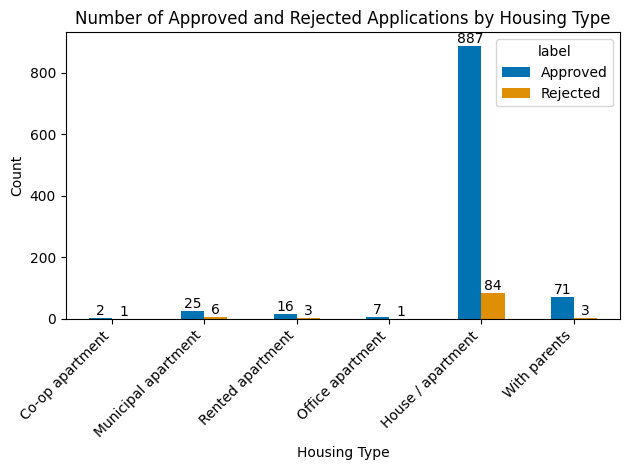

In [ ]:
# prompt: bikin buat double bar untuk housing_typeyang rejected dan approved kasih keterangan angka dan ukurannya disesuaikan agar keterangan angkanya keliatan, palletenya colorblind. urutannya sesuaikan kaya bar percentage-nya

# Group the data by 'housing_type' and 'label' and count the occurrences
housing_counts = df.groupby(['housing_type', 'label'])['label'].count().unstack()

# Sort the index based on the rejection percentage calculated earlier
housing_counts = housing_counts.loc[housing_rejection_percentage.index]

# Create a double bar plot
plt.figure(figsize=(12, 6))
ax = housing_counts.plot(kind='bar', color=sns.color_palette("colorblind"))
plt.xlabel('Housing Type')
plt.ylabel('Count')
plt.title('Number of Approved and Rejected Applications by Housing Type')
plt.xticks(rotation=45, ha='right')

# Add count labels above each bar
for p in ax.patches:
    count = '{:.0f}'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    ax.annotate(count, (x, y), ha='center', va='bottom', size=10, color='black')

plt.tight_layout()
plt.show()


Grafik menunjukkan bahwa penghuni co-op apartment menghadapi tingkat penolakan aplikasi kartu kredit tertinggi sebesar 33.3%, sementara mereka yang tinggal bersama orang tua memiliki tingkat penolakan terendah sebesar 4.1%. Ini mengindikasikan bahwa jenis tempat tinggal mempengaruhi persepsi risiko oleh pemberi pinjaman, dengan co-op apartment dianggap berisiko tinggi dan tinggal bersama orang tua dianggap paling aman secara finansial.

1. **Co-op apartment**:
   - **Definisi**: Cooperative apartment atau co-op adalah jenis hunian di mana penghuni membeli saham di perusahaan yang memiliki gedung apartemen dan sebagai gantinya mendapatkan hak untuk tinggal di unit tertentu.
   - **Karakteristik**: Penghuni tidak memiliki unit apartemen itu sendiri, tetapi memiliki saham di perusahaan. Biasanya terdapat persyaratan ketat dan proses seleksi untuk menjadi anggota co-op.

2. **Municipal apartment**:
   - **Definisi**: Apartemen yang dimiliki atau dikelola oleh pemerintah kota atau lembaga pemerintah lainnya.
   - **Karakteristik**: Seringkali disediakan untuk individu atau keluarga berpenghasilan rendah atau menengah. Biasanya memiliki biaya sewa yang terjangkau dan diatur oleh pemerintah.

3. **Rented apartment**:
   - **Definisi**: Apartemen yang disewa dari pemilik properti oleh penyewa.
   - **Karakteristik**: Penyewa membayar sewa bulanan untuk tinggal di apartemen tersebut untuk jangka waktu tertentu sesuai dengan kontrak sewa.

4. **Office apartment**:
   - **Definisi**: Apartemen yang terletak di gedung yang sebagian besar berfungsi sebagai ruang kantor.
   - **Karakteristik**: Biasanya memiliki fasilitas yang ditujukan untuk profesional atau bisnis, dan bisa juga digunakan sebagai tempat tinggal sementara oleh pekerja yang bekerja di gedung yang sama.

5. **House/apartment**:
   - **Definisi**: Rumah atau apartemen pribadi yang dimiliki oleh individu atau keluarga.
   - **Karakteristik**: Pemilik memiliki hak penuh atas properti tersebut dan tidak terikat dengan aturan atau regulasi yang ketat seperti dalam co-op atau properti sewaan.

6. **With parents**:
   - **Definisi**: Situasi di mana individu tinggal bersama orang tua mereka di rumah keluarga.
   - **Karakteristik**: Biasanya terjadi pada orang muda yang belum mandiri secara finansial atau memilih untuk tinggal bersama orang tua untuk menghemat biaya hidup.


### Percentage of Rejected Credit Card Applications by Type of Occupation

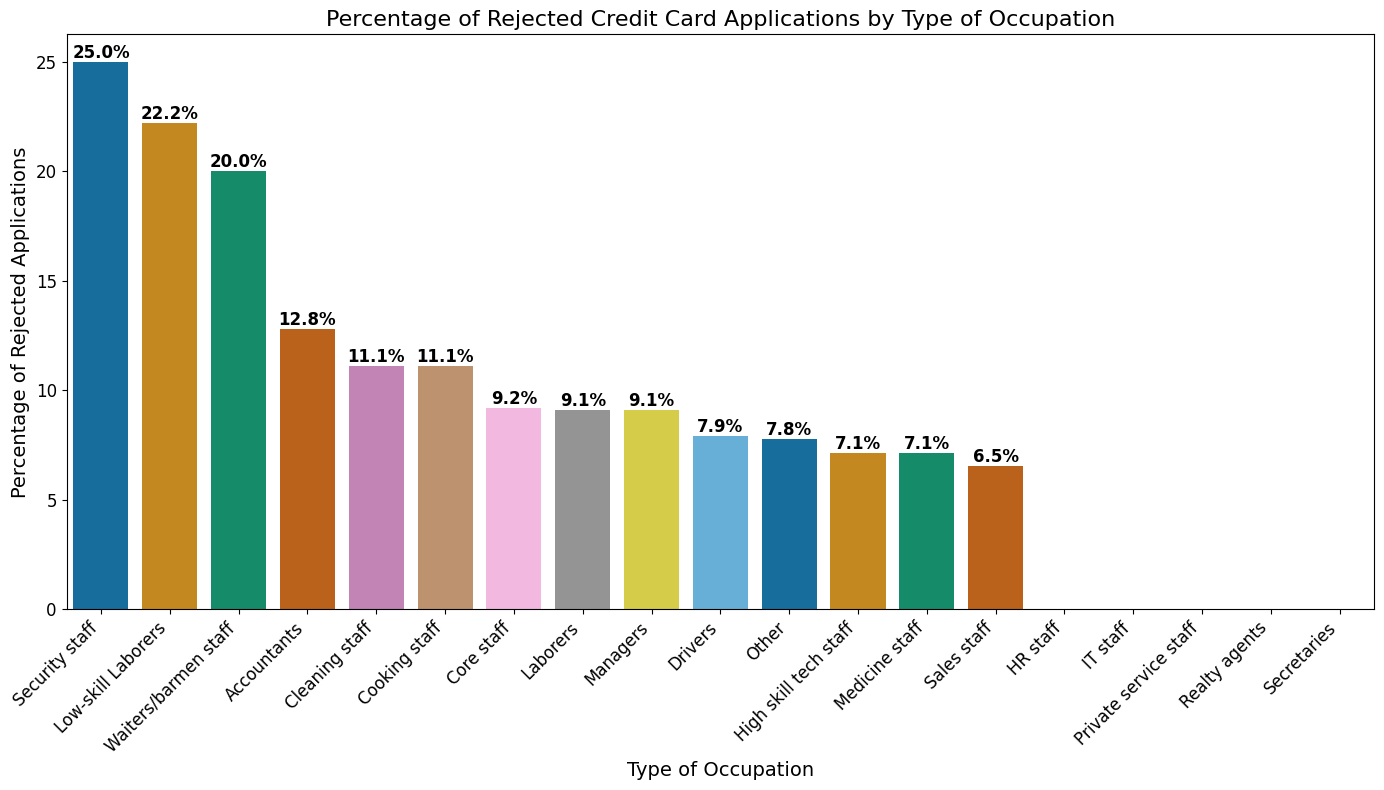

It seems that type of occupation has some influence on credit card application rejections.
Applicants working in 'Security staff' and 'Low-skill Laborers'have the highest rejection rates.


In [ ]:
# Group the data by 'type_occupation' and 'label', and count the occurrences
grouped = df.groupby(['type_occupation', 'label'])['type_occupation'].count().unstack()

# Calculate the percentage of rejected applications for each type_occupation
grouped['Rejection Percentage'] = (grouped['Rejected'] / (grouped['Approved'] + grouped['Rejected'])) * 100

# Sort the results in descending order of rejection percentage
grouped = grouped.sort_values('Rejection Percentage', ascending=False)

# Create a bar plot
plt.figure(figsize=(14, 8))  # Adjusted size for better proportions
ax = sns.barplot(x=grouped.index, y=grouped['Rejection Percentage'], hue=grouped.index, palette='colorblind', legend=False)
plt.xlabel('Type of Occupation', fontsize=14)
plt.ylabel('Percentage of Rejected Applications', fontsize=14)
plt.title('Percentage of Rejected Credit Card Applications by Type of Occupation', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)

# Add percentage labels above each bar
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', size=12, color='black', weight='bold')

plt.tight_layout()
plt.show()

print("It seems that type of occupation has some influence on credit card application rejections.")
print("Applicants working in 'Security staff' and 'Low-skill Laborers'have the highest rejection rates.")


In [ ]:
# prompt: Group the data by 'type_occupation' and 'label', and count the occurrences dan hitung totalnya, dan hitung hasil persentasenya

# Group the data by 'type_occupation' and 'label', and count the occurrences
grouped = df.groupby(['type_occupation', 'label'])['type_occupation'].count().unstack()

# Fill any missing values with 0
grouped = grouped.fillna(0)

# Calculate the total count for each type_occupation
grouped['Total'] = grouped['Approved'] + grouped['Rejected']

# Calculate the percentage of approved and rejected applications for each type_occupation
grouped['Approved Percentage'] = (grouped['Approved'] / grouped['Total']) * 100
grouped['Rejected Percentage'] = (grouped['Rejected'] / grouped['Total']) * 100

# Display the result
grouped


label,Approved,Rejected,Total,Approved Percentage,Rejected Percentage
type_occupation,,,,,
Accountants,34.0,5.0,39.0,87.179487,12.820513
Cleaning staff,16.0,2.0,18.0,88.888889,11.111111
Cooking staff,16.0,2.0,18.0,88.888889,11.111111
Core staff,138.0,14.0,152.0,90.789474,9.210526
Drivers,70.0,6.0,76.0,92.105263,7.894737
HR staff,3.0,0.0,3.0,100.000000,0.000000
High skill tech staff,52.0,4.0,56.0,92.857143,7.142857
IT staff,0.0,1.0,1.0,0.000000,100.000000
Laborers,210.0,21.0,231.0,90.909091,9.090909


Grafik menunjukkan bahwa staf keamanan mengalami tingkat penolakan aplikasi kartu kredit tertinggi (25%), sementara staf sales memiliki tingkat penolakan terendah (6.5%). Ini mengindikasikan bahwa jenis pekerjaan mempengaruhi penilaian risiko oleh pemberi kredit, dengan pekerjaan berisiko lebih tinggi seperti keamanan dan buruh kasar lebih sering ditolak dibandingkan pekerjaan di bidang HR atau teknologi.

### Percentage of Rejected Credit Card Applications by Customer Age

<ipython-input-23-766ee0bb2a0a>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['age_group', 'label'])['label'].count().unstack()
<ipython-input-23-766ee0bb2a0a>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=grouped.index, y=grouped['Rejection Percentage'], palette='colorblind')


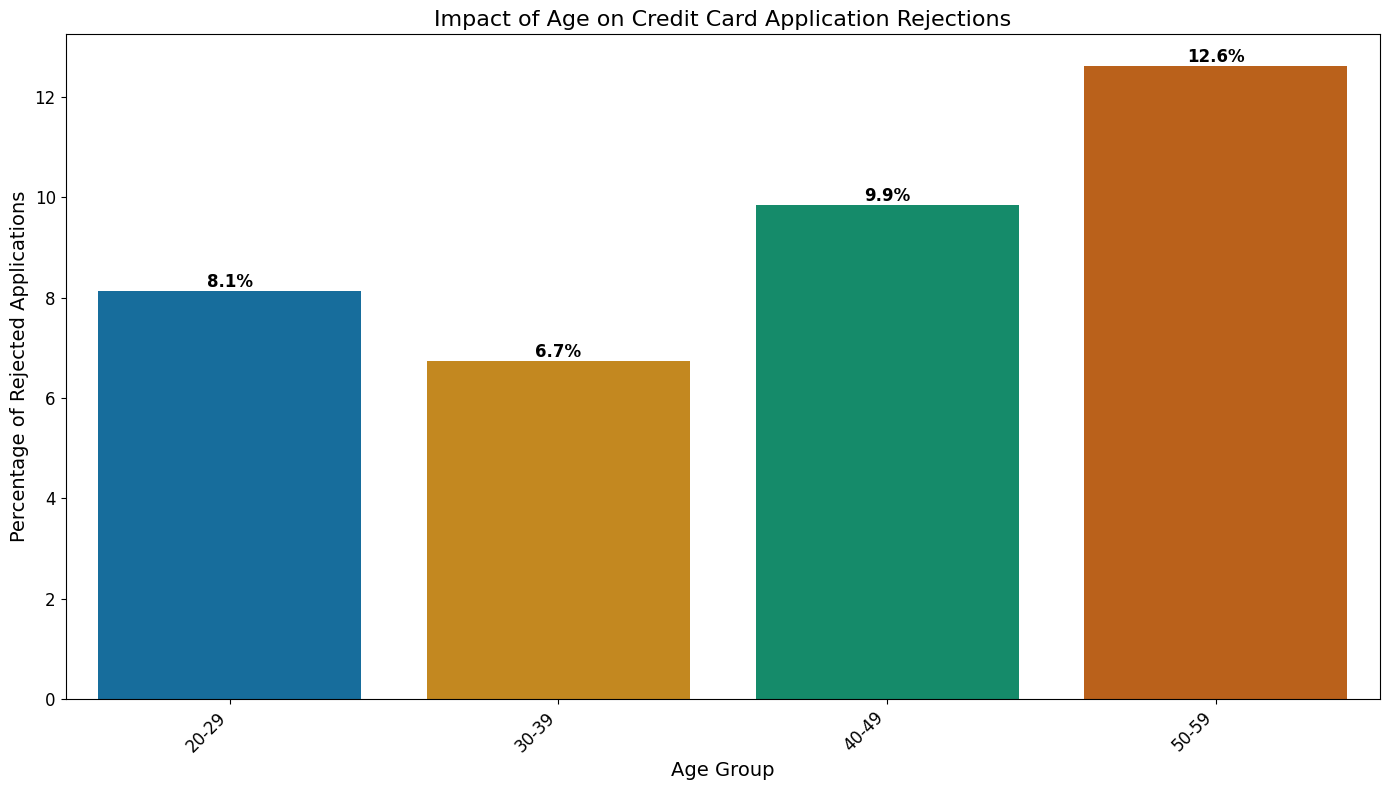

It appears that age has an influence on credit card application rejections.
Older age groups (50-59 years) have the highest rejection rates,


In [ ]:
# Create age categories (range per decade)
bins = [20, 30, 40, 50, 60]
labels = ['20-29', '30-39', '40-49', '50-59']
df['age_group'] = pd.cut(df['customer_age_years'], bins=bins, labels=labels, right=False)

# Calculate rejection percentage per age group
grouped = df.groupby(['age_group', 'label'])['label'].count().unstack()
grouped['Rejection Percentage'] = (grouped['Rejected'] / (grouped['Approved'] + grouped['Rejected'])) * 100
grouped = grouped.sort_values('Rejection Percentage', ascending=False)

# Visualization
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=grouped.index, y=grouped['Rejection Percentage'], palette='colorblind')
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Percentage of Rejected Applications', fontsize=14)
plt.title('Impact of Age on Credit Card Application Rejections', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add percentage labels above each bar
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', size=12, color='black', weight='bold')

plt.tight_layout()
plt.show()

print("It appears that age has an influence on credit card application rejections.")
print("Older age groups (50-59 years) have the highest rejection rates,")

In [ ]:
# prompt: Group the data by 'customer_age_years' and 'label', and count the occurrences dan hitung totalnya, dan hitung hasil persentasenya, terus kelompok umurnya sesuaikan kaya chart diatas syntax ini

# Group the data by 'customer_age_years' and 'label', and count the occurrences
age_counts = df.groupby(['age_group', 'label'])['label'].count().unstack()

# Fill any missing values with 0
age_counts = age_counts.fillna(0)

# Calculate the total count for each age group
age_counts['Total'] = age_counts['Approved'] + age_counts['Rejected']

# Calculate the percentage of approved and rejected applications for each age group
age_counts['Approved Percentage'] = (age_counts['Approved'] / age_counts['Total']) * 100
age_counts['Rejected Percentage'] = (age_counts['Rejected'] / age_counts['Total']) * 100

# Display the result
age_counts


<ipython-input-35-e41bae4905dc>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_counts = df.groupby(['age_group', 'label'])['label'].count().unstack()


label,Approved,Rejected,Total,Approved Percentage,Rejected Percentage
age_group,,,,,
20-29,147,13,160,91.875000,8.125000
30-39,346,25,371,93.261456,6.738544
40-49,311,34,345,90.144928,9.855072
50-59,180,26,206,87.378641,12.621359


In [ ]:
# prompt: Mean age_group by credit card application status only rejected

# Group the data by 'label' and calculate the mean age for rejected applications
mean_age_rejected = df[df['label'] == 'Rejected'].groupby('label')['customer_age_years'].mean()

# Print the result
mean_age_rejected


,customer_age_years
label,
Rejected,41.795918


# Others

### Percentage of Rejected Credit Card Applications by Marital Status

<ipython-input-25-a6bce7fb1740>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=grouped.index, y=grouped['Rejection Percentage'], palette='colorblind')


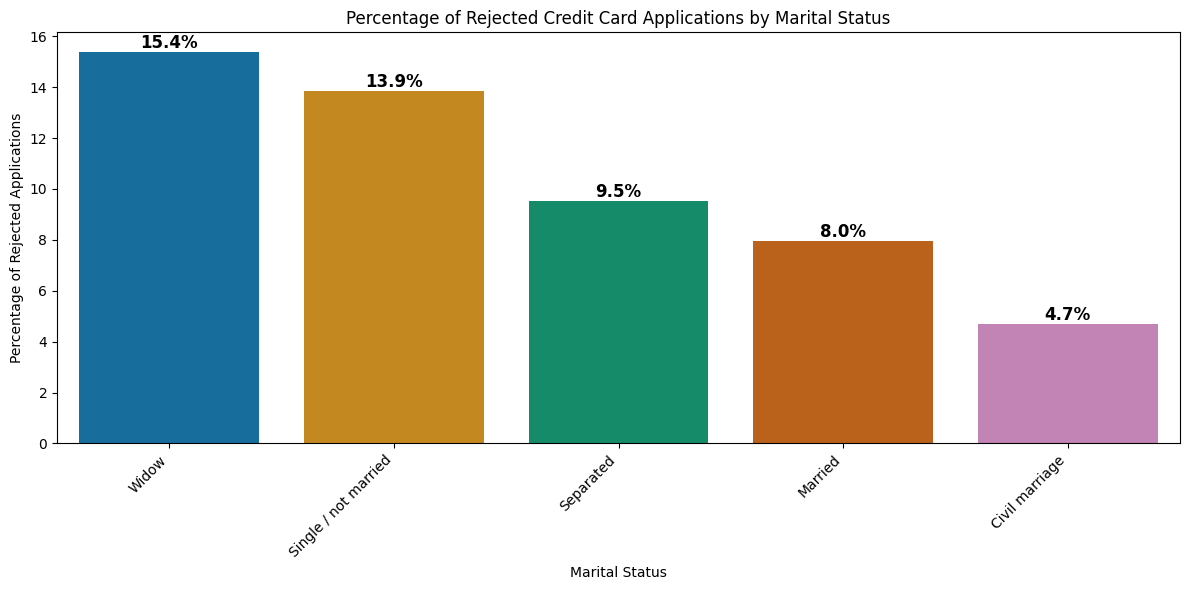

It seems that marital status has some influence on credit card application rejections.
Applicants who are 'Single / not married' have the highest rejection rates.


In [ ]:
# prompt: persentase rejection rate dari marital status dan visualisasinya

# Group the data by 'marital_status' and 'label', and count the occurrences
grouped = df.groupby(['marital_status', 'label'])['marital_status'].count().unstack()

# Calculate the percentage of rejected applications for each marital status
grouped['Rejection Percentage'] = (grouped['Rejected'] / (grouped['Approved'] + grouped['Rejected'])) * 100

# Sort the results in descending order of rejection percentage
grouped = grouped.sort_values('Rejection Percentage', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=grouped.index, y=grouped['Rejection Percentage'], palette='colorblind')
plt.xlabel('Marital Status')
plt.ylabel('Percentage of Rejected Applications')
plt.title('Percentage of Rejected Credit Card Applications by Marital Status')
plt.xticks(rotation=45, ha='right')

# Add percentage labels above each bar
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', size=12, color='black', weight='bold')

plt.tight_layout()
plt.show()

print("It seems that marital status has some influence on credit card application rejections.")
print("Applicants who are 'Single / not married' have the highest rejection rates.")

In [ ]:
# prompt: Group the data by 'marital_status' and 'label', and count the occurrences dan hitung totalnya, dan hitung hasil persentasenya, terus kelompok umurnya sesuaikan kaya chart diatas syntax ini

# Group the data by 'marital_status' and 'label', and count the occurrences
age_counts = df.groupby(['marital_status', 'label'])['label'].count().unstack()

# Fill any missing values with 0
age_counts = age_counts.fillna(0)

# Calculate the total count for each age group
age_counts['Total'] = age_counts['Approved'] + age_counts['Rejected']

# Calculate the percentage of approved and rejected applications for each age group
age_counts['Approved Percentage'] = (age_counts['Approved'] / age_counts['Total']) * 100
age_counts['Rejected Percentage'] = (age_counts['Rejected'] / age_counts['Total']) * 100

# Display the result
age_counts


label,Approved,Rejected,Total,Approved Percentage,Rejected Percentage
marital_status,,,,,
Civil marriage,81,4,85,95.294118,4.705882
Married,705,61,766,92.036554,7.963446
Separated,57,6,63,90.476190,9.523810
Single / not married,143,23,166,86.144578,13.855422
Widow,22,4,26,84.615385,15.384615


<Figure size 1200x600 with 0 Axes>

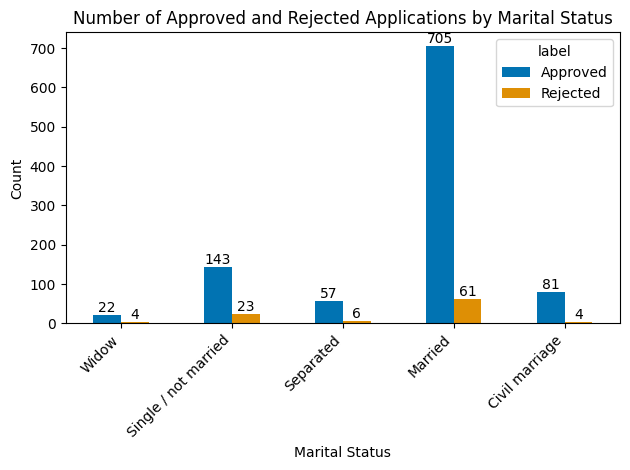

In [ ]:
# prompt: bikin buat double bar untuk marital_status yang rejected dan approved kasih keterangan angka dan ukurannya disesuaikan agar keterangan angkanya keliatan, palletenya colorblind. urutannya sesuaikan dengan nilai percentage-nya

# Group the data by 'marital_status' and 'label', and count the occurrences
grouped = df.groupby(['marital_status', 'label'])['marital_status'].count().unstack()

# Fill any missing values with 0
grouped = grouped.fillna(0)

# Calculate the percentage of rejected applications for each marital status
grouped['Rejection Percentage'] = (grouped['Rejected'] / (grouped['Approved'] + grouped['Rejected'])) * 100

# Sort the results in descending order of rejection percentage
grouped = grouped.sort_values('Rejection Percentage', ascending=False)
grouped = grouped.drop('Rejection Percentage', axis=1)

# Create a double bar plot
plt.figure(figsize=(12, 6))
ax = grouped.plot(kind='bar', color=sns.color_palette("colorblind"))
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Number of Approved and Rejected Applications by Marital Status')
plt.xticks(rotation=45, ha='right')

# Add count labels above each bar
for p in ax.patches:
    count = '{:.0f}'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    ax.annotate(count, (x, y), ha='center', va='bottom', size=10, color='black')

plt.tight_layout()
plt.show()


### Credit Card Application Rejections by Income Group

<ipython-input-28-5fb3a69d0e13>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['income_group', 'label'])['label'].count().unstack()
<ipython-input-28-5fb3a69d0e13>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=grouped.index, y=grouped['Rejection Percentage'], palette='colorblind')


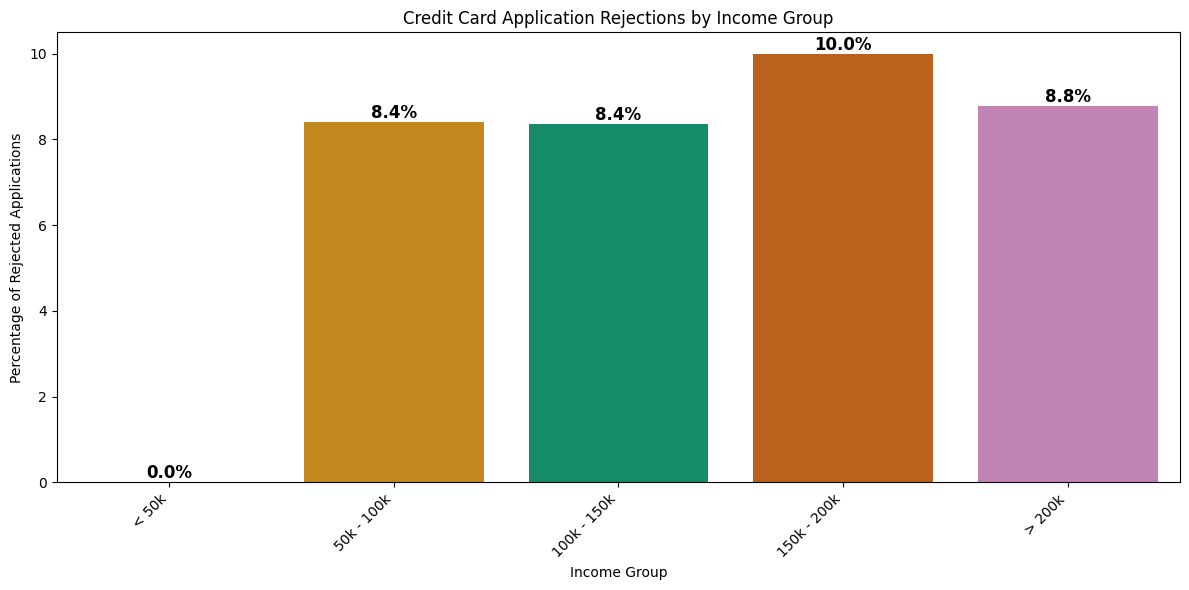

It seems that income group has some influence on credit card application rejections.
Applicants in the lowest income group (< 50k) have the highest rejection rates.


In [ ]:
# prompt: Credit Card Application Rejections by Income Group

# Define income groups
income_bins = [0, 50000, 100000, 150000, 200000, float('inf')]
income_labels = ['< 50k', '50k - 100k', '100k - 150k', '150k - 200k', '> 200k']
df['income_group'] = pd.cut(df['annual_income'], bins=income_bins, labels=income_labels)

# Calculate rejection percentage per income group
grouped = df.groupby(['income_group', 'label'])['label'].count().unstack()
grouped['Rejection Percentage'] = (grouped['Rejected'] / (grouped['Approved'] + grouped['Rejected'])) * 100
grouped = grouped.sort_values('Rejection Percentage', ascending=False)

# Visualization
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=grouped.index, y=grouped['Rejection Percentage'], palette='colorblind')
plt.xlabel('Income Group')
plt.ylabel('Percentage of Rejected Applications')
plt.title('Credit Card Application Rejections by Income Group')
plt.xticks(rotation=45, ha='right')

# Add percentage labels above each bar
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', size=12, color='black', weight='bold')

plt.tight_layout()
plt.show()

print("It seems that income group has some influence on credit card application rejections.")
print("Applicants in the lowest income group (< 50k) have the highest rejection rates.")


In [ ]:
# prompt: Group the data by 'income_group' and 'label', and count the occurrences dan hitung totalnya, dan hitung hasil persentasenya, terus kelompok umurnya sesuaikan kaya chart diatas syntax ini

# Group the data by 'income_group' and 'label', and count the occurrences
age_counts = df.groupby(['income_group', 'label'])['label'].count().unstack()

# Fill any missing values with 0
age_counts = age_counts.fillna(0)

# Calculate the total count for each age group
age_counts['Total'] = age_counts['Approved'] + age_counts['Rejected']

# Calculate the percentage of approved and rejected applications for each age group
age_counts['Approved Percentage'] = (age_counts['Approved'] / age_counts['Total']) * 100
age_counts['Rejected Percentage'] = (age_counts['Rejected'] / age_counts['Total']) * 100

# Display the result
age_counts


<ipython-input-29-3d62b60345c1>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_counts = df.groupby(['income_group', 'label'])['label'].count().unstack()


label,Approved,Rejected,Total,Approved Percentage,Rejected Percentage
income_group,,,,,
< 50k,5,0,5,100.000000,0.000000
50k - 100k,98,9,107,91.588785,8.411215
100k - 150k,274,25,299,91.638796,8.361204
150k - 200k,216,24,240,90.000000,10.000000
> 200k,415,40,455,91.208791,8.791209


<ipython-input-30-681f2c0f46b4>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['income_group', 'label'])['income_group'].count().unstack()


<Figure size 1200x600 with 0 Axes>

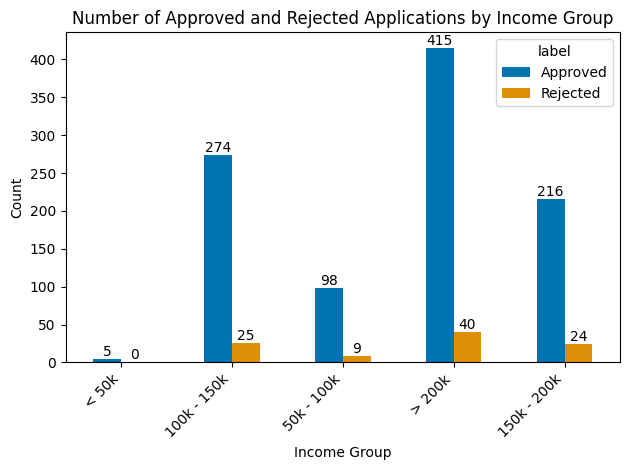

In [ ]:
# prompt: bikin buat double bar untuk income_group yang rejected dan approved kasih keterangan angka dan ukurannya disesuaikan agar keterangan angkanya keliatan, palletenya colorblind. urutannya income groupnya dengan nilai percentage-nya. urutkan dari yang terkecil

# Group the data by 'income_group' and 'label', and count the occurrences
grouped = df.groupby(['income_group', 'label'])['income_group'].count().unstack()

# Fill any missing values with 0
grouped = grouped.fillna(0)

# Calculate the rejection percentage and sort
grouped['Rejection Percentage'] = (grouped['Rejected'] / (grouped['Approved'] + grouped['Rejected'])) * 100
grouped = grouped.sort_values('Rejection Percentage')
grouped = grouped.drop('Rejection Percentage', axis=1)

# Create a double bar plot
plt.figure(figsize=(12, 6))
ax = grouped.plot(kind='bar', color=sns.color_palette("colorblind"))
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.title('Number of Approved and Rejected Applications by Income Group')
plt.xticks(rotation=45, ha='right')

# Add count labels above each bar
for p in ax.patches:
    count = '{:.0f}'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    ax.annotate(count, (x, y), ha='center', va='bottom', size=10, color='black')

plt.tight_layout()
plt.show()


### Impact of Family Size on Credit Card Application Decisions

<ipython-input-31-fcb1382f9c5a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=grouped.index, y=grouped['Rejection Percentage'], palette='colorblind')


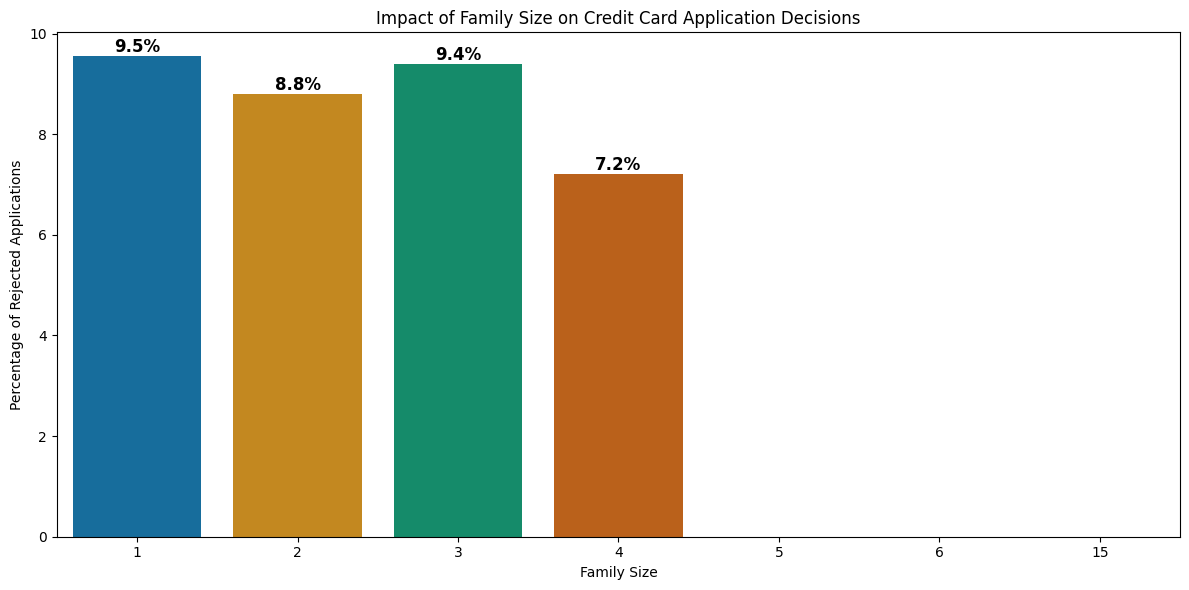

It seems that family size has some influence on credit card application rejections.
Applicants with larger family sizes tend to have higher rejection rates.


In [ ]:
# prompt: Impact of Family Size on Credit Card Application Decisions

# Calculate rejection percentage per family size
grouped = df.groupby(['family_members', 'label'])['label'].count().unstack()
grouped['Rejection Percentage'] = (grouped['Rejected'] / (grouped['Approved'] + grouped['Rejected'])) * 100
grouped = grouped.sort_values('Rejection Percentage', ascending=False)

# Visualization
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=grouped.index, y=grouped['Rejection Percentage'], palette='colorblind')
plt.xlabel('Family Size')
plt.ylabel('Percentage of Rejected Applications')
plt.title('Impact of Family Size on Credit Card Application Decisions')

# Add percentage labels above each bar
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', size=12, color='black', weight='bold')

plt.tight_layout()
plt.show()

print("It seems that family size has some influence on credit card application rejections.")
print("Applicants with larger family sizes tend to have higher rejection rates.")


### Credit Card Application Rejections by Education Level

<ipython-input-32-4cc58a0b4c9f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=grouped.index, y=grouped['Rejection Percentage'], palette='colorblind')


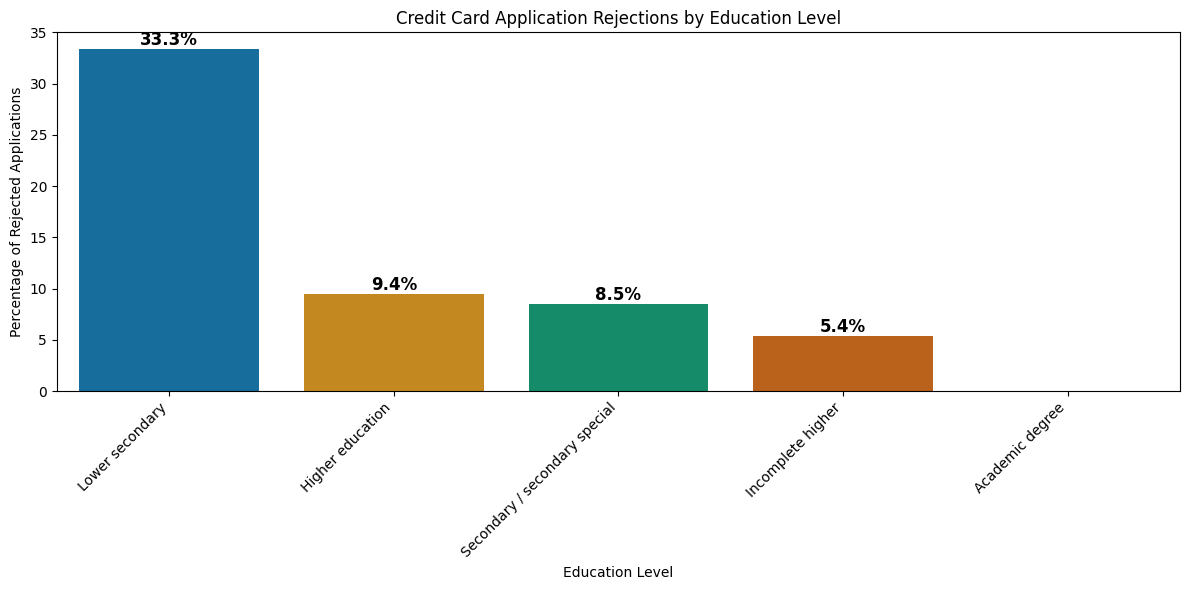

It seems that education level has some influence on credit card application rejections.
Applicants with lower education levels tend to have higher rejection rates.


In [ ]:
# prompt: Credit Card Application Rejections by Education Level

# Group the data by 'education' and 'label', and count the occurrences
grouped = df.groupby(['education', 'label'])['education'].count().unstack()

# Calculate the percentage of rejected applications for each education level
grouped['Rejection Percentage'] = (grouped['Rejected'] / (grouped['Approved'] + grouped['Rejected'])) * 100

# Sort the results in descending order of rejection percentage
grouped = grouped.sort_values('Rejection Percentage', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=grouped.index, y=grouped['Rejection Percentage'], palette='colorblind')
plt.xlabel('Education Level')
plt.ylabel('Percentage of Rejected Applications')
plt.title('Credit Card Application Rejections by Education Level')
plt.xticks(rotation=45, ha='right')

# Add percentage labels above each bar
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', size=12, color='black', weight='bold')

plt.tight_layout()
plt.show()

print("It seems that education level has some influence on credit card application rejections.")
print("Applicants with lower education levels tend to have higher rejection rates.")


In [ ]:
# prompt: Group the data by 'education' and 'label', and count the occurrences dan hitung totalnya, dan hitung hasil persentasenya, terus kelompok umurnya sesuaikan kaya chart diatas syntax ini

# Group the data by 'education' and 'label', and count the occurrences
age_counts = df.groupby(['education', 'label'])['label'].count().unstack()

# Fill any missing values with 0
age_counts = age_counts.fillna(0)

# Calculate the total count for each age group
age_counts['Total'] = age_counts['Approved'] + age_counts['Rejected']

# Calculate the percentage of approved and rejected applications for each age group
age_counts['Approved Percentage'] = (age_counts['Approved'] / age_counts['Total']) * 100
age_counts['Rejected Percentage'] = (age_counts['Rejected'] / age_counts['Total']) * 100

# Display the result
age_counts


label,Approved,Rejected,Total,Approved Percentage,Rejected Percentage
education,,,,,
Academic degree,2.0,0.0,2.0,100.000000,0.000000
Higher education,288.0,30.0,318.0,90.566038,9.433962
Incomplete higher,53.0,3.0,56.0,94.642857,5.357143
Lower secondary,8.0,4.0,12.0,66.666667,33.333333
Secondary / secondary special,657.0,61.0,718.0,91.504178,8.495822


<Figure size 1200x600 with 0 Axes>

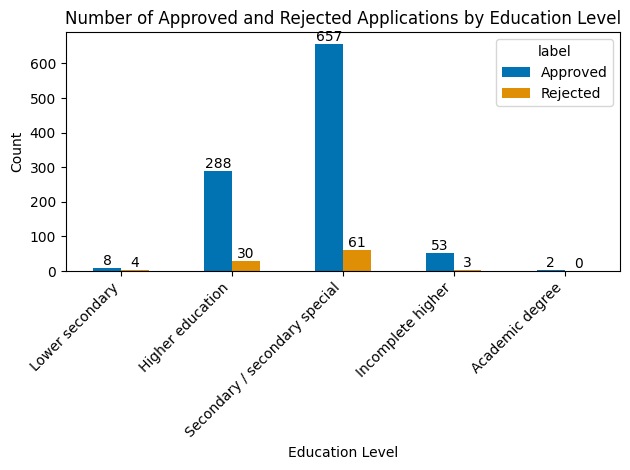

In [ ]:
# prompt: bikin buat double bar untuk education yang rejected dan approved kasih keterangan angka dan ukurannya disesuaikan agar keterangan angkanya keliatan, palletenya colorblind. urutannya income groupnya dengan nilai percentage-nya. urutannya dibalik

# Group the data by 'education' and 'label', and count the occurrences
grouped = df.groupby(['education', 'label'])['education'].count().unstack()

# Fill any missing values with 0
grouped = grouped.fillna(0)

# Calculate the rejection percentage and sort
grouped['Rejection Percentage'] = (grouped['Rejected'] / (grouped['Approved'] + grouped['Rejected'])) * 100
grouped = grouped.sort_values('Rejection Percentage', ascending=False)
grouped = grouped.drop('Rejection Percentage', axis=1)

# Create a double bar plot
plt.figure(figsize=(12, 6))
ax = grouped.plot(kind='bar', color=sns.color_palette("colorblind"))
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Number of Approved and Rejected Applications by Education Level')
plt.xticks(rotation=45, ha='right')

# Add count labels above each bar
for p in ax.patches:
    count = '{:.0f}'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    ax.annotate(count, (x, y), ha='center', va='bottom', size=10, color='black')

plt.tight_layout()
plt.show()
